In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1),
                       activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
h = model.fit(X_train, y_train, validation_split=0.25, epochs=50,
             batch_size=200, callbacks=[early_stopping])

Epoch 1/50
225/225 [==============================] - 183s 809ms/step - loss: 0.3081 - accuracy: 0.9063 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 2/50
225/225 [==============================] - 175s 779ms/step - loss: 0.0996 - accuracy: 0.9699 - val_loss: 0.0611 - val_accuracy: 0.9808
Epoch 3/50
225/225 [==============================] - 193s 859ms/step - loss: 0.0733 - accuracy: 0.9783 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 4/50
225/225 [==============================] - 197s 876ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0445 - val_accuracy: 0.9863
Epoch 5/50
225/225 [==============================] - 179s 795ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0438 - val_accuracy: 0.9873
Epoch 6/50
225/225 [==============================] - 180s 800ms/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0455 - val_accuracy: 0.9871
Epoch 7/50
225/225 [==============================] - 157s 698ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0401 -

In [7]:
print('Test Accuray: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 97s 309ms/step - loss: 0.0304 - accuracy: 0.9924
Test Accuray: 0.9924


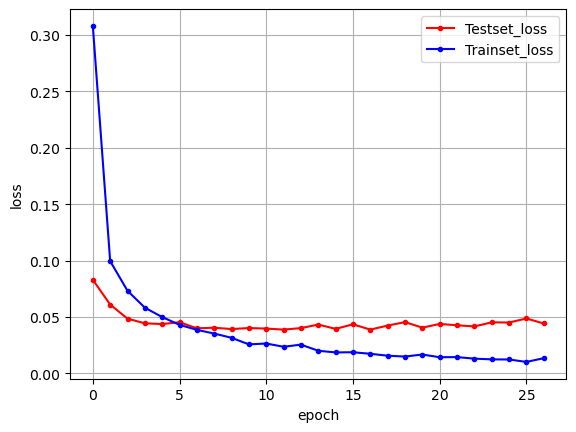

In [8]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()